# 5章Pandas入門

In [1]:
import numpy as np
import pandas as pd

## 5.1　Pandasのデータ構造(P136)
### 5.1.1 シリーズ(Series)
- 1次元の配列のようなオブジェクト
- 連続した値とそれに関連付けられたインデックスが含まれる

In [291]:
obj = pd.Series([4,7,-5,3])

In [292]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

- value属性とindex属性でそれぞれを取得出来る

In [293]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [294]:
obj.index #range(4)と同等

RangeIndex(start=0, stop=4, step=1)

- インデックス付きのシリーズを作成

In [295]:
obj2 = pd.Series([4,7,-5,3],index=['b','d','a','c'])

In [296]:
obj2

b    4
d    7
a   -5
c    3
dtype: int64

- インデックスのラベルから指定出来る

In [297]:
obj2['a']

-5

In [298]:
obj2[['c','a','d']]

c    3
a   -5
d    7
dtype: int64

In [299]:
# 条件指定のフィルタリング
obj2[obj2 >0]

b    4
d    7
c    3
dtype: int64

- ディクショナリ形式からシリーズを作成可能

In [300]:
sdata = {'AA':100,'BB':200,'CC':300}
obj3 = pd.Series(sdata)

In [301]:
obj3

AA    100
BB    200
CC    300
dtype: int64

- ディクショナリの場合新たにキーを渡すとその順番に並び替える

In [302]:
aa = ['CC','BB','EE']
obj4 = pd.Series(sdata,index=aa)
obj4 #キーがない場合はNaNになる

CC    300.0
BB    200.0
EE      NaN
dtype: float64

- Pandasのisnullとnotnullは欠損値を特定する

In [303]:
pd.isnull(obj4) #obj4.isnull()でもOK

CC    False
BB    False
EE     True
dtype: bool

- オブジェクト自身とそのインデックスはname属性を持つ

In [304]:
obj4.name ='zzz'
obj4.index.name='qqq'
obj4

qqq
CC    300.0
BB    200.0
EE      NaN
Name: zzz, dtype: float64

## 5.1.2 データフレーム(DataFrame) P140
- テーブル形式のデータ構造を持ち、順序付けされた列を持つ
- 一般的な作成方法は、同じ長さを持つリスト型の値を持ったディクショナリかNumpyの配列

In [305]:
data ={'ken':['aichi','aich','aich','tokyo','tokyo','tokyo'],
       'yer':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}

In [306]:
df = pd.DataFrame(data)

In [307]:
df

,ken,yer,pop
0,aichi,2000,1.5
1,aich,2001,1.7
2,aich,2002,3.6
3,tokyo,2001,2.4
4,tokyo,2002,2.9
5,tokyo,2003,3.2


- 列の順番を指定出来る

In [308]:
df00 = pd.DataFrame(data, columns = ['yer', 'pop', 'ken'])
df00

,yer,pop,ken
0,2000,1.5,aichi
1,2001,1.7,aich
2,2002,3.6,aich
3,2001,2.4,tokyo
4,2002,2.9,tokyo
5,2003,3.2,tokyo


- 指定した列がない場合は欠損値が代入される  
※df2['debt']=NaNでも列を追加出来る

In [309]:
df2 = pd.DataFrame(data,columns=['yer','pop','ken','debt'],
                   index=['a','b','c','d','e','f'])
df2

,yer,pop,ken,debt
a,2000,1.5,aichi,NaN
b,2001,1.7,aich,NaN
c,2002,3.6,aich,NaN
d,2001,2.4,tokyo,NaN
e,2002,2.9,tokyo,NaN
f,2003,3.2,tokyo,NaN


- ディクショナリ風の参照や属性指定することでシリーズとして取り出せる

In [310]:
df2['ken']  #df2.kenでもOK

a    aichi
b     aich
c     aich
d    tokyo
e    tokyo
f    tokyo
Name: ken, dtype: object

- 行も位置や名前で参照出来る、名前で参照するにはloc属性を使う

In [311]:
df2.loc['b']

yer     2001
pop      1.7
ken     aich
debt     NaN
Name: b, dtype: object

- 列の値は代入して変更できる
    - 列にリストや配列を代入する場合はdfの長さと一致する必要あり

In [312]:
df2['debt']=16.5

In [313]:
df2

,yer,pop,ken,debt
a,2000,1.5,aichi,16.5
b,2001,1.7,aich,16.5
c,2002,3.6,aich,16.5
d,2001,2.4,tokyo,16.5
e,2002,2.9,tokyo,16.5
f,2003,3.2,tokyo,16.5


- シリーズを代入する場合、ラベルはdfのindexに従って正確に一致するよう代入される

In [314]:
val =pd.Series([-1.2,-1.5,-1.7],index=['b','d','f'])

In [315]:
df2['debt'] = val
df2

,yer,pop,ken,debt
a,2000,1.5,aichi,NaN
b,2001,1.7,aich,-1.2
c,2002,3.6,aich,NaN
d,2001,2.4,tokyo,-1.5
e,2002,2.9,tokyo,NaN
f,2003,3.2,tokyo,-1.7


- 新しい列追加はdf2['est']=15　で出来る
- 列の削除はdel df2['est']　

- ネストした辞書の場合は外側の辞書キーを列のindex、内側のindexキーを行のindexとする

In [316]:
pop = {'aichi':{2001:2.4,2002:2.9},
      'tokyo':{2001:1.5,2001:1.7,2002:3.6}}
df3 = pd.DataFrame(pop)

In [317]:
df3

,aichi,tokyo
2001,2.4,1.7
2002,2.9,3.6


- dfはNumpyと同じ文法で転置(行列の入れ替え)が出来る

In [318]:
df3.T

,2001,2002
aichi,2.4,2.9
tokyo,1.7,3.6


- インデックス指定した場合は指定順になる

In [319]:
df3 = pd.DataFrame(pop,index=[2001,2002,2003])
df3

,aichi,tokyo
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


- シリーズと同じくvaluesを参照すると、dfのデータが2次元のndarrayとして戻される

In [320]:
df3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, nan]])

### ■dfのコンストラクタに渡すことが可能な入力値
- 2次元nadarray
- 配列、リスト、タプルをバリューに持つディクショナリ
- NumPyの構造化/レコード配列
- シリーズをバリューに持つディクショナリ
- ディクショナリをバリューに持つディクショナリ
- ディクショナリ、又はシリーズのリスト
- リスト又はタプルのリスト
- 別のデータフレーム
- NumPyのMaskedArray

## 5.1.3 インデックスオブジェクト
- インデックスオブジェクトは軸ラベルや軸name、names属性などを保持する役目
- インデックスオブジェクトは変更不可(immutable)  index[1] = 'd'とは出来ない
- Pythonのセットと異なり重複したラベルを持つことが出来る

In [321]:
labels = pd.Index(np.arange(3))

In [322]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [323]:
obj2 = pd.Series([1.5,-2.5,3],index=labels)

In [324]:
obj2

0    1.5
1   -2.5
2    3.0
dtype: float64

In [325]:
# indexオブジェクトは固定長のセットとしても機能する
df3.columns

Index(['aichi', 'tokyo'], dtype='object')

In [326]:
'aichi' in df3

True

### ■インデックスオブジェクトのメソッドと属性
- append: 追加のインデックスを連結し、新しいインデックスを生成
- difference：集合の差を計算する
- intersection: 集合の論理積を計算
- union: 和集合を計算する
- isin: 各値が集合に含まれているかブール型の配列を計算
- delete：指定したi番目の要素を削除した新しいインデックスオブジェクトを作成
- drop：指定した値を削除
- insert：指定したi番目に要素を挿入
- is_monotonic: 各要素が１つ前の要素と等しいか、それよりも大きい場合にTrueが戻される
- is_unique：重複した値を持たない場合にTrueが戻される
- unique：インデックスオブジェクトから重複のない値の配列を計算する

## 5.2　Pandasの重要な機能(P149)
### 5.2.1 再インデックス付け
- reindexメソッドは新しいインデックスに従った新しいオブジェクトを作成

In [327]:
obj = pd.Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [328]:
obj2 = obj.reindex(['a','b','c','d','e'])

In [329]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

- reindexでメソッドを使うと内挿や穴埋めが出来る

In [330]:
obj3 = pd.Series(['AA','BB','CC'],index=[0,2,4])
obj3

0    AA
2    BB
4    CC
dtype: object

In [331]:
obj3.reindex(range(6),method='ffill') #ffillだと値が前方に穴埋めされる

0    AA
1    AA
2    BB
3    BB
4    CC
5    CC
dtype: object

- dfではreindexで行や列インデックスを変更出来る
    - 列は引数columnsを指定する df3.reindex(column = ['aichi', 'mie'])

In [332]:
df3

,aichi,tokyo
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [333]:
df33= df3.reindex([2001, 2002, 2006])
df33

,aichi,tokyo
2001,2.4,1.7
2002,2.9,3.6
2006,NaN,NaN


### ■reindexメソッドの引数
- index:インデックスに使用する新しいシーケンス
- method:内挿、穴埋め方法の指定。ffillは前方に穴埋め、bfillは後方に穴埋め
- fill_value:再index付きのとき、欠損値の代わりに使用する値
- limit:前方、後方穴埋め時にどれだけの数のギャップを埋めるか、その最大値
- tolerance:前方、後方穴埋め時にindexの数値にどれくらい差がある場合まで穴埋めするかの最大値
- level:階層型index使用時に再index付けを行う階層を指定する
- copy:Trueを指定すると、新旧indexが同じ場合、常にデータコピー。Falseはコピーされない

## 5.2.2 軸から要素を削除する 

- dropメソッドで指定した要素から軸が削除された新しいオブジェクトを作成

In [334]:
obj2.drop(['b','d'])

a   -5.3
c    3.6
e    NaN
dtype: float64

In [335]:
df2

,yer,pop,ken,debt
a,2000,1.5,aichi,NaN
b,2001,1.7,aich,-1.2
c,2002,3.6,aich,NaN
d,2001,2.4,tokyo,-1.5
e,2002,2.9,tokyo,NaN
f,2003,3.2,tokyo,-1.7


- dfの場合、ラベルを指定してdropを呼び出すと行(第0軸)から値が削除される

In [336]:
df2.drop(['a','d'])

,yer,pop,ken,debt
b,2001,1.7,aich,-1.2
c,2002,3.6,aich,NaN
e,2002,2.9,tokyo,NaN
f,2003,3.2,tokyo,-1.7


- dfの場合、axis=1又はaxis='columns'を指定すると、列(第1軸)から値が削除される

In [337]:
df2.drop('pop',axis=1)

,yer,ken,debt
a,2000,aichi,NaN
b,2001,aich,-1.2
c,2002,aich,NaN
d,2001,tokyo,-1.5
e,2002,tokyo,NaN
f,2003,tokyo,-1.7


- inplaceを使うとdfを直接置き換える事が出来る（通常のdropは新しいオブジェクトを戻す)

In [338]:
df2.drop('pop',axis=1,inplace=True)

## 5.2.3 インデックス参照、選択、フィルタリング

In [339]:
obj5 = pd.Series(np.arange(4.),index=['b','d','a','c'])
obj5

b    0.0
d    1.0
a    2.0
c    3.0
dtype: float64

In [340]:
obj5[['b','c']]

b    0.0
c    3.0
dtype: float64

In [341]:
obj5[1:3]

d    1.0
a    2.0
dtype: float64

In [342]:
obj5['b':'c']=5

In [343]:
obj5

b    5.0
d    5.0
a    5.0
c    5.0
dtype: float64

In [344]:
df2

,yer,ken,debt
a,2000,aichi,NaN
b,2001,aich,-1.2
c,2002,aich,NaN
d,2001,tokyo,-1.5
e,2002,tokyo,NaN
f,2003,tokyo,-1.7


In [345]:
df2[['debt','ken']]

,debt,ken
a,NaN,aichi
b,-1.2,aich
c,NaN,aich
d,-1.5,tokyo
e,NaN,tokyo
f,-1.7,tokyo


In [346]:
df2[0:2]

,yer,ken,debt
a,2000,aichi,NaN
b,2001,aich,-1.2


In [347]:
df5 = df2.drop(['ken','debt'],axis=1)

In [348]:
df5

,yer
a,2000
b,2001
c,2002
d,2001
e,2002
f,2003


In [349]:
# カラムが文字列以外ならdfと値を比較して真偽値を持つdfが出来る
df5 >5

,yer
a,True
b,True
c,True
d,True
e,True
f,True


In [350]:
df2

,yer,ken,debt
a,2000,aichi,NaN
b,2001,aich,-1.2
c,2002,aich,NaN
d,2001,tokyo,-1.5
e,2002,tokyo,NaN
f,2003,tokyo,-1.7


In [351]:
#軸のラベルを使うときはloc
df2.loc['b',['yer','ken']]

yer    2001
ken    aich
Name: b, dtype: object

In [352]:
#整数のインデックス位置による参照はiloc
df2.iloc[2]

yer     2002
ken     aich
debt     NaN
Name: c, dtype: object

### ■データフレームにおけるインデックス参照の方法
- df[val] ：列や列のシーケンスを取り出す方法
- df.loc[val] :1つ以上の行をラベルを指定して選択
- df.loc[:, val] :1つ以上の列をラベルを指定して選択       
- df.loc[val1, val2] :行、列列をラベルを指定して選択
- df.iloc[where] :1つ以上の行を整数のインデックス位置を選択
- df.iloc[:, where] :1つ以上の列を整数のインデックス位置を選択
- df.iloc[w_i, w_j] :行と列を整数のインデックスを指定       　　　
- df.at[label_i, label_j] :行と列のラベルを指定して、１つの値を取得
- df.iat :行と列のインデックスを指定して１つの値を取得       　　　
- reindexメソッド ：行や列をラベルを指定して選択
- get_value,set_valueメソッド ：行と列のラベルを指定して、１つの値を選択

## 5.2.4整数のインデックス
- indexに整数を整数を使う場合、データ選択する時は常にindex位置参照
    - obj[-1]は出来ない
    - 文字列indexでは上記は可能   

## 5.2.5算術とデータの整形

In [353]:
#重複してないindexは欠損値が代入される
s1 = pd.Series([7,2,3,1],index=['a','c','d','e'])
s2 = pd.Series([2,4,1,5,3],index=['a','c','e','f','g'])
s1 + s2

a    9.0
c    6.0
d    NaN
e    2.0
f    NaN
g    NaN
dtype: float64

In [354]:
# np.nanでNaNを代入出来る
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))
df2.loc[1,'b']=np.nan

In [355]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [356]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),columns=list('abcd'))

In [357]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


- addメソッドを使う時、引数にfill_value=0を使うと欠損値を0にしてくれる

In [358]:
df1.add(df2, fill_value= 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [359]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [360]:
df1.div(1)

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [361]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


### ■算術メソッド
- add,radd:加算メソッド(+)
- sub,rsub:減算メソッド(-)
- div,rdiv:徐算メソッド(/)
- floordiv,rfloordiv:除算を行った後、床関数を適用(//)
- mul,rmul:乗算を行うメソッド(*)
- pow,rpow:累乗を行うメソッド(**) 

## 5.2.5.2 データフレームとシリーズでの演算
- デフォルトではシリーズのindexとdfの列がマッチングされブロードキャストは行方法で行われる

In [362]:
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))

In [363]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [364]:
series77 =df2.iloc[2]
series77

a    10.0
b    11.0
c    12.0
d    13.0
e    14.0
Name: 2, dtype: float64

In [365]:
#ブロードキャストは行方法
df2- series77

,a,b,c,d,e
0,-10.0,-10.0,-10.0,-10.0,-10.0
1,-5.0,-5.0,-5.0,-5.0,-5.0
2,0.0,0.0,0.0,0.0,0.0
3,5.0,5.0,5.0,5.0,5.0


In [366]:
# インデックスが見つからない場合は再インデックスされ和集合が形成
series88 = pd.Series(range(3), index=['b', 'c','f'])

In [367]:
frame88 =df2.loc[:,'c':'e']

In [368]:
frame88 - series88

,b,c,d,e,f
0,NaN,1.0,NaN,NaN,NaN
1,NaN,6.0,NaN,NaN,NaN
2,NaN,11.0,NaN,NaN,NaN
3,NaN,16.0,NaN,NaN,NaN


- ブロードキャストを列方向に行うには算術メソッドを使い、引数axisをつかう

In [369]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [370]:
df5 = df2['e']

In [371]:
df5

0     4.0
1     9.0
2    14.0
3    19.0
Name: e, dtype: float64

In [372]:
df2.sub(df5,axis='index')

,a,b,c,d,e
0,-4.0,-3.0,-2.0,-1.0,0.0
1,-4.0,-3.0,-2.0,-1.0,0.0
2,-4.0,-3.0,-2.0,-1.0,0.0
3,-4.0,-3.0,-2.0,-1.0,0.0


## 5.2.6 関数の適用とマッピング

- Numpyのufunc(メソッド)はpandasでも有効

In [373]:
np.abs(df2)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


- 1次元配列に適用可能な関数を行や列に適用する場合はapplyメソッドを使う

In [374]:
f = lambda x:x.max()-x.min()

In [375]:
# フレームの各列で1度だけ呼び出されている
df2.apply(f)

a    15.0
b    15.0
c    15.0
d    15.0
e    15.0
dtype: float64

In [376]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [377]:
# applyの引数にaxis='columns'とすれば各行に対して1度ずつこの関数が呼ばれる
df2.apply(f,axis='columns')

0    4.0
1    4.0
2    4.0
3    4.0
dtype: float64

- applyメソッドに渡す関数はスカラー値以外、例えば複数の値を持ったシリーズでもOK

In [378]:
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])

In [379]:
df2.apply(f)

,a,b,c,d,e
min,0.0,1.0,2.0,3.0,4.0
max,15.0,16.0,17.0,18.0,19.0


- 要素(スカラー)ごとに関数を使う場合はapplymap

In [380]:
format = lambda x: x * 2
df2.applymap(format)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,8.0
1,10.0,12.0,14.0,16.0,18.0
2,20.0,22.0,24.0,26.0,28.0
3,30.0,32.0,34.0,36.0,38.0


- シリーズが要素ごとに関数を使う場合はmap

In [381]:
df2['d'].map(format)

0     6.0
1    16.0
2    26.0
3    36.0
Name: d, dtype: float64

### ■まとめ
- NumPyの関数の引数にpandasオブジェクトを指定
     - 関数の引数にpandasオブジェクトを指定可能
     - 関数の種類および引数の設定によって要素・行・列いずれに適用されるかが異なる
     - pandasオブジェクトのメソッドとして用意されている関数もある      
- pandasオブジェクトのメソッドで関数を適用
    - 要素（スカラー値）に対する関数  
       ・Seriesの各要素に適用: map(), apply()  
       ・DataFrameの各要素に適用: applymap()  
    - 行や列（一次元配列）に対する関数  
       ・DataFrameの各行・各列に適用: apply()

## 5.2.7 ソートとランク

In [382]:
# 行や列のインデックスを辞書順でソートするにはsort_index
obj527 = pd.Series(range(4), index =['d', 'a', 'b', 'c'])

In [383]:
obj527.sort_index

<bound method Series.sort_index of d    0
a    1
b    2
c    3
dtype: int64>

In [384]:
# dfでは軸ごとにインデックスをソート出来る
frame527 = pd.DataFrame(np.arange(8).reshape((2,4)),
                       index = ['three', 'one'],
                       columns = ['d', 'a', 'b', 'c'])
frame527.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [385]:
# 降順も出来る
frame527.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [593]:
# シリーズを値によってソートするにはsort_valuesメソッド
# デフォルトでは欠損値はシリーズの末尾にソート
obj = pd.Series([7,-5,7,4,2,np.nan,4])
obj

0    7.0
1   -5.0
2    7.0
3    4.0
4    2.0
5    NaN
6    4.0
dtype: float64

In [594]:
obj.sort_values()

1   -5.0
4    2.0
3    4.0
6    4.0
0    7.0
2    7.0
5    NaN
dtype: float64

In [388]:
#dfのソートは１つ以上の列をソートキーに指定する
df2.sort_values(by= 'd')

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [389]:
#複数の列でソートする場合は列の名前をリストで渡す
df2.sort_values(by=['d', 'e'])

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [390]:
# ランクは配列のデータから妥当な数値をランクとして代入
# タイになったグループは各グループに平均値を代入
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [391]:
# ランクは観測された順番に従って代入可能
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [392]:
#dfは行か列でランクを計算できる
df2.rank(axis='columns')

,a,b,c,d,e
0,1.0,2.0,3.0,4.0,5.0
1,1.0,2.0,3.0,4.0,5.0
2,1.0,2.0,3.0,4.0,5.0
3,1.0,2.0,3.0,4.0,5.0


- ランクがタイになった時のルール一覧
	- 'average':デフォルトルール、平均値を代入
	- 'min':最小ランクを代入
	- 'max':最大ランクを代入
	- 'first':データが出現した順番に従って代入
	- 'dense':minと同じだがランクがグループ間で１ずつ増える

## 5.2.8 重複したラベルを持つ軸のインデックス

In [393]:
# インデックスラベルが一意がどうか確認する
obj528 = pd.Series(range(5), index=['a','b','c','d','d'])
obj528.index.is_unique

False

In [394]:
obj528['d']

d    3
d    4
dtype: int64

## 5.3　要約統計量の集計と計算(P172) 

In [395]:
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [396]:
df2.sum()

a    30.0
b    34.0
c    38.0
d    42.0
e    46.0
dtype: float64

In [397]:
df2.sum(axis='columns')

0    10.0
1    35.0
2    60.0
3    85.0
dtype: float64

#### ■集約メソッドのオプション
- axis：集約する方向軸. 0が行方向、1が列方向
- skipna:欠損値を除外するかどうか、デフォルトはTrue
- level:MultiIndexの場合、集約対象のグループの階層を指定

In [398]:
# describeメソッドは要約統計量
# 数値でない場合は別の要約統計量を示す
df2.describe()

,a,b,c,d,e
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.500000,8.500000,9.500000,10.500000,11.500000
std,6.454972,6.454972,6.454972,6.454972,6.454972
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,3.750000,4.750000,5.750000,6.750000,7.750000
50%,7.500000,8.500000,9.500000,10.500000,11.500000
75%,11.250000,12.250000,13.250000,14.250000,15.250000
max,15.000000,16.000000,17.000000,18.000000,19.000000


### ■要約統計量の一覧
- count: NAではない要素の数
- describe: 複数の要約統計量を求める
- min,max: 最小値、最大値を求める
- argmin,argmax: 最小値、最大値が得られたインデックス位置(整数)を求める
- idmin,idmax: 最小値、最大値が得られた要素のラベルを求める
- quantile: データのパーセント点を0から1の範囲で求める
- sum: 合計値
- mean: 平均値
- median: 中央値
- mad: 平均値からの平均絶対偏差
- prod: 全ての値の積
- var: 標本分散
- std: 標本標準偏差
- skew: 標本歪度
- kurt: 標本尖度
- cumsum: 累積合計値
- cummin,cummax: 累積の最小値と最大値
- cumprod: 累積の積
- diff: 1次の階差を求める(時系列データで便利)
- pct_change: パーセントの変化を求める

## 5.3.1 相関と共分散

In [399]:
# corrはindex順に並んだNAでない値の重なりから相関
df2['b'].corr(df2['e']) #df2.b.corr(df2.e)でもOK

1.0

In [400]:
#covはindex順に並んだNAでない値の重なりから共分散
df2['b'].cov(df2['e']) 

41.666666666666664

In [401]:
# dfのcorrとcovはデータフレーム形式で戻す
df2.corr()

,a,b,c,d,e
a,1.0,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,1.0


In [402]:
#dfにcorrwithを使うと特定の行や列と別のシリーズやdfに対する相関を求める
#axis='colunms'を指定すると行で同じことが出来る
df2.corrwith(df2.e)

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64

## 5.3.2 一意な値、頻度の確認、所属の確認 

In [403]:
#シリーズの中の一意な値を配列として取り出す
#ソートをしたい場合はuniques.sort()
obj532 = pd.Series(['c','a','b','a','a','b','b','d'])
uniques = obj532.unique()
uniques

array(['c', 'a', 'b', 'd'], dtype=object)

In [404]:
#シリーズに含まれる値の頻度を求めるにはvalue_counts
obj532.value_counts()

a    3
b    3
d    1
c    1
dtype: int64

In [405]:
#value_countは配列やシーケンスにも使える
pd.value_counts(obj532, sort=False)

c    1
d    1
b    3
a    3
dtype: int64

In [406]:
#isinはベクトル形式の集合を指定してその値のいずれかが含まれるか確認できる
mask = obj532.isin(['b','c'])
mask

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
dtype: bool

In [407]:
obj532[mask]

0    c
2    b
5    b
6    b
dtype: object

### ■一意な値、頻度の確認、所属の確認をするメソッド
- isin: 各シリーズの値が引数で渡された値に含まれているか真偽値の配列を求める
- get_indexer: ある配列を一意な値を持つ別配列にする為、各値のインデックス位置を求める
- unique：シリーズの値のうち、一意な値を観測された順に取り出す
- value_counts: インデックスに対応する値の頻度を求める。頻度の降順に並ぶ  

In [408]:
# dfで複数の列でヒストグラムを表示したい時
df2.apply(pd.value_counts).fillna(0)

,a,b,c,d,e
0.0,1.0,0.0,0.0,0.0,0.0
1.0,0.0,1.0,0.0,0.0,0.0
2.0,0.0,0.0,1.0,0.0,0.0
3.0,0.0,0.0,0.0,1.0,0.0
4.0,0.0,0.0,0.0,0.0,1.0
5.0,1.0,0.0,0.0,0.0,0.0
6.0,0.0,1.0,0.0,0.0,0.0
7.0,0.0,0.0,1.0,0.0,0.0
8.0,0.0,0.0,0.0,1.0,0.0
9.0,0.0,0.0,0.0,0.0,1.0


# 「6章」データの読み込み、書き出しとファイル形式　P181
## 6.1. テキスト形式のデータの読み書き
### Pandasのデータ読み込み関数
- read_csv: デフォルトの区切り文字はコンマ
- read_table: デフォルトの区切り文字はタブ('\t')
- read_fwf： 区切り文字がないが列の幅が固定されている
- read_clipboard: クリップボードからデータを読み込む
- read_excel: XLSやXLSXファイルからテーブル形式のデータを読み込む
- read_hdf: HDF5ファイを読む
- read_html: HTML文書に含まれているテーブルを読む
- read_json: JSONの文字列表現からデータを読み込む
- read_msgpack: MessagePackバイナリ形式を用いて符号化されたpandasデータを読み込む
- read_pickle: Pythonのpickle形式で書き出されたオブジェクトを読み込む
- read_sas: sasデータセットを読む
- read_sql: SQLクエリを発行した結果をpandasデータフレームとして読む
- read_state: Stataファイル形式を読む
- read_feather: Featherバイナリ形式を読み込む

In [409]:
# pandas.read_csvなどは型推論（どの列がどの型か）が行われる
df5 = pd.read_csv('./pydata-book-2nd-edition/examples/ex1.csv')

In [410]:
df5

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [411]:
#ヘッダ行がない場合はデフォルトの列名代入や自分で指定出来る
pd.read_csv('./pydata-book-2nd-edition/examples/ex1.csv',header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [412]:
pd.read_csv('./pydata-book-2nd-edition/examples/ex1.csv',names=['a','b','c'])

,,a,b,c
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [413]:
#特定の列をインデックスにしたい場合は、列番号か列名を指定する
pd.read_csv('./pydata-book-2nd-edition/examples/ex1.csv',index_col= 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [414]:
#階層型インデックスを作る場合は列の数か名前のリストを与える
parsed = pd.read_csv('./pydata-book-2nd-edition/examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [415]:
#決まった区切り文字がない場合、read_tableに正規表現を与えて区切り文字を指定する
pd.read_table('./pydata-book-2nd-edition/examples/ex3.txt',sep='\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [416]:
#特定の行を読み飛ばすにはskiprows
pd.read_csv('./pydata-book-2nd-edition/examples/ex4.csv',skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [417]:
df6 = pd.read_csv('./pydata-book-2nd-edition/examples/ex5.csv')
df6

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [418]:
#欠損値とみなす文字を指定するにはna_values
df6 = pd.read_csv('./pydata-book-2nd-edition/examples/ex5.csv',na_values=['1'])
df6

,something,a,b,c,d,message
0,one,NaN,2,3.0,4,NaN
1,two,5.0,6,NaN,8,world
2,three,9.0,10,11.0,12,foo


### ■read_csvとread_tableによく与える引数
- path: ファイルシステム上の位置やURLを示す文字列
- sep,delimiter: 各行を分割するのに用いる文字列あるいは正規表現
- header: 列名として使う行番号、デフォは0、ヘッダがない場合はNoneで指定
- index_col: 行のインデックスとして使う列の番号か名前を指定
- names: 列名をリストで指定する、header=Noneとともに使用
- skiprows: 読み飛ばす行番号を指定(最初の行は0)
- na_values: 欠損値として置き換える文字を指定
- comment: 文字又は文字列以降を各行からコメントとして切り離す
- parse_dates: データを日時として読み込む。デフォはfalseでTrueだと全ての列で読み込む  
      　   　　特定列の場合は列の番号か名前を指定  
      　   　　リストがタプルやリストだと複数列を結合して日付として読む  
              (日時と時刻など２つを1個にする)
- keep_data_col: 複数の列を結合して日付として読む場合、結合に用いられた列を残す
- converters: データを読み込むついでに簡単な処理をしたいときに関数を入れる
- dayfirst: 日にちが最初にくる形式として取り扱う
- date_parser：日付を読み込むのに用いる関数
- nrows:ファイル先頭で読み込む行数
- iterator:ファイルを読み込むのではなくイテレータとして扱うことができる
- skip_footer:ファイル末尾で無視する行数
- encoding:Unicodeとして用いる文字コード
- skip_blank_lines:空白の行を読み飛ばす

## 6.1.1 テキストを少しずつ読み込む

In [419]:
#csvファイル全体を読み込まず数行だけ読み取る場合は行数をnrowsで指定
pd.read_csv('./pydata-book-2nd-edition/examples/ex6.csv',nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [420]:
#ファイルを少しずつ読み込みたい場合は一度に読み込む行数をchunksizeで指定する
pd.read_csv('./pydata-book-2nd-edition/examples/ex6.csv',chunksize=1000)

## 6.1.2 テキスト形式でのデータの書き出し

In [421]:
# to_csvを用いるとデータをコンマ区切りのファイルに書き出せる
#df6.to_csv('./pydata-book-2nd-edition/examples/out66.csv')

In [422]:
#通常は欠損値は空文字列になるが別の標識で表示したい場合
#df6.to_csv('./pydata-book-2nd-edition/examples/out66.csv',na_rep='NULL')

In [423]:
#行と列のラベルを無効にする
#df6.to_csv('./pydata-book-2nd-edition/examples/out66.csv',index=False,header=False)

## 6.2.2 Microsoft Excelファイルの読み込み

In [424]:
# Excelfileを使うにはインスタンスを使う、複数シートを読み込むときに良い
xlsx = pd.ExcelFile('./pydata-book-2nd-edition/examples/ex1.xlsx')
Ex_fm =pd.read_excel(xlsx,'Sheet1')
Ex_fm

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [425]:
#1つのシートだけであれば次のように書く事も出来る
# pd.read_excel('./pydata-book-2nd-edition/examples/ex1.xlsx','sheet1')   

In [426]:
#書き出すにはExcelWriterを作成しto_excelメソッド
#writer = pd.ExcelWriter('./pydata-book-2nd-edition/examples/ex33.xlsx')
#Ex_fm.to_excel(wiritr, 'Sheet1')

In [427]:
#to_excelにファイルのパスを与えても書き出せる
#Ex_fm.to_excel('./pydata-book-2nd-edition/examples/ex33.xlsx')

## 6.3 Web APIを用いたデータの取得　P203

In [428]:
#・requestsパッケージを使う
# import requests
# url ='http://api.github.com/
# resp = requests.get(url)

## 6.4 データベースからのデータの取得　P205 

# 7章　データのクリーニングと前処理

### 7.1 欠損値の取り扱い　P209

### ■欠損値を扱うメソッド
- dropna: 指定した軸について、その軸のラベルの値に欠損値が含まれていたらラベルを削除  
   　　   含まれている欠損値の数がいくつまでなら削除しないか閾値で指定可能
- fillna: 欠損値を指定した値で穴埋めする、'ffill'や'bfill'などの方法もある
- isnull: 各値が欠損値であるか一連の真偽値を戻す
- notnull: isnullの反対の動作をする

## 7.1.1 欠損値を削除する

In [429]:
from numpy import nan as NA
data = pd.Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [430]:
# dropnaが便利
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [431]:
# dropnaと同じ
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [432]:
# dfの場合dropnaは欠損値を1個でも含む行を全て削除がデフォルト
data711 = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                       [NA, NA, NA], [NA, 6.5, 3.]])
data711

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [433]:
data711.dropna()

,0,1,2
0,1.0,6.5,3.0


In [434]:
#how='all'を指定すると全てのデータが欠損値である行のみ削除
data711.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [435]:
#行ではなく列を削除する場合はaxis=1を指定
data711[4]= NA
data711.dropna(axis=1, how= 'all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [436]:
#含まれている欠損値の数がいくつまでなら削除しないか閾値で指定可能
data711.dropna(thresh= 2)

,0,1,2,4
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


## 7.1.2 欠損値を穴埋めする

In [437]:
#欠損値を別の値で置き換えたい場合fillna
data711.fillna(0)

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [438]:
#fillnaの引数に辞書を与えると、列ごとに異なる値で埋める
data711.fillna({1: 0.5, 4:2})

,0,1,2,4
0,1.0,6.5,3.0,2.0
1,1.0,0.5,NaN,2.0
2,NaN,0.5,NaN,2.0
3,NaN,6.5,3.0,2.0


In [439]:
#fillnaの引数にinplace=Trueとすると既存オブジェクトを直接変更可能
#data711.fillna(0, inplace = True)

In [440]:
#reindexと同じ穴埋め方法(ffill,bfill)が使える
data711.fillna(method='ffill')

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,6.5,3.0,NaN
2,1.0,6.5,3.0,NaN
3,1.0,6.5,3.0,NaN


## ■fillnaの引数
- value: 欠損値の穴埋めにつかう値
- method: 穴埋め方法を指定する、指定がないとデフォは'ffill'
- axis: 穴埋めしたい軸。デフォルトはaxis=0
- implace: コピーを作るのではなく、元オブジェクトを直接変更する
- limit: ffill,bfillへの穴埋め時に連続した穴埋めを最大何回まで行うかを指定

## 7.2 データの変形　P215
### 7.2.1 重複の削除

In [441]:
data = pd.DataFrame({
    'k1':['one','two'] * 3 + ['two'],
    'k2':[1,1,2,3,3,4,4]
})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [442]:
#dfのduplicatedは真偽値のシリーズを返す
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [443]:
#drop_duplicatesは重複を削除する
#デフォルトは全ての列が同じ場合に重複
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [444]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [445]:
#重複の対象を指定可能
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [446]:
#デフォルトは重複が見つかった最初を残すが、keep='last'にすると最後になる
data.drop_duplicates(['k1', 'k2'], keep= 'last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## 7.2.2 関数やマッピングを用いたデータの変換

In [447]:
number = {
    'one':'11',
    'two':'22',
    
}
number

{'one': '11', 'two': '22'}

In [448]:
# シリーズのmapメソッドはマッピングを定義した関数オブジェクトかディクショナリを渡せる
data['nn'] = data['k1'].map(number)
data

,k1,k2,v1,nn
0,one,1,0,11
1,two,1,1,22
2,one,2,2,11
3,two,3,3,22
4,one,3,4,11
5,two,4,5,22
6,two,4,6,22


In [449]:
# 列の値を全て大文字にするのは、str.upper(),　小文字はstr.lower()
data['k1'].str.upper()

0    ONE
1    TWO
2    ONE
3    TWO
4    ONE
5    TWO
6    TWO
Name: k1, dtype: object

## 7.2.3 値の置き換え

In [450]:
data723 = pd.Series([1., -999., 2., -999., -1000., 3.])
data723

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [451]:
# replaceメソッドでデータを置き換える
# inplace=Trueとしないと、新しいシリーズが戻る
data723.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [452]:
# 複数の場合は、第一引数にリスト、第二引数に入れる値を指定
data723.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [453]:
# 置き換えたい値ごとにいれる値が違う場合
data723.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [454]:
# 置き替え前後の値をディクショナリで指定可能
data723.replace({-999:np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 7.2.4 値のインデックスの名前を変更する

In [455]:
data3 = pd.DataFrame({
    'k1':['one','two'] * 3 + ['two'],
    'k2':[1,1,2,3,3,4,4]
},index=['a','b','c','d','e','f','g'])
data3

,k1,k2
a,one,1
b,two,1
c,one,2
d,two,3
e,one,3
f,two,4
g,two,4


In [456]:
trans = lambda x: x[:].upper()

In [457]:
# インデックスもmapで変更出来る
data3.index=data3.index.map(trans)
data3

,k1,k2
A,one,1
B,two,1
C,one,2
D,two,3
E,one,3
F,two,4
G,two,4


In [458]:
#元のデータセットを変更せず変更後の軸を持つデータセットを別に作成する場合はrenameメソッド
data3.rename(index=str.title,columns=str.upper)

,K1,K2
A,one,1
B,two,1
C,one,2
D,two,3
E,one,3
F,two,4
G,two,4


In [459]:
# ディクショナリを使うと一部ラベルのみ変更可能
# 元のデータセットを直接変更するにはinplace=True
data3.rename(index={'A':'AAA'},columns={'k2':'KKK2'})

,k1,KKK2
AAA,one,1
B,two,1
C,one,2
D,two,3
E,one,3
F,two,4
G,two,4


## 7.2.5 離散化とビニング

In [460]:
# ビニングはpandasのcutを使用
ages =[20,22,25,27,21,61,37,31]
bins = [18,25,60,100]
cats = pd.cut(ages,bins)

In [461]:
cats

[(18, 25], (18, 25], (18, 25], (25, 60], (18, 25], (60, 100], (25, 60], (25, 60]]
Categories (3, interval[int64]): [(18, 25] < (25, 60] < (60, 100]]

In [462]:
# 各binのデータ数を数える
# (が開区間、[が閉区間
pd.value_counts(cats)

(18, 25]     4
(25, 60]     3
(60, 100]    1
dtype: int64

In [463]:
# 左側を閉区間[にする場合
pd.cut(ages,bins,right=False)

[[18, 25), [18, 25), [25, 60), [25, 60), [18, 25), [60, 100), [25, 60), [25, 60)]
Categories (3, interval[int64]): [[18, 25) < [25, 60) < [60, 100)]

In [464]:
# labelsオプションでビンの名前をリストか配列で渡せば設定可能
names=['YY','MM','XX']
pd.cut(ages,bins,labels=names)

[YY, YY, YY, MM, YY, XX, MM, MM]
Categories (3, object): [YY < MM < XX]

In [465]:
data6 = np.random.rand(20)
data6

array([0.2675668 , 0.38011437, 0.94936397, 0.2596583 , 0.65765411,
       0.53531968, 0.02926954, 0.88958397, 0.68692734, 0.63997327,
       0.64514506, 0.37798951, 0.52878785, 0.33570795, 0.77345516,
       0.00680706, 0.44018721, 0.16710358, 0.65873072, 0.64043735])

In [466]:
# binの数を指定する場合(例は４つ)
# precisionはビンを設定する境界値を小数点以下2桁の精度に設定する
pd.cut(data6,4,precision=2)

[(0.24, 0.48], (0.24, 0.48], (0.71, 0.95], (0.24, 0.48], (0.48, 0.71], ..., (0.0059, 0.24], (0.24, 0.48], (0.0059, 0.24], (0.48, 0.71], (0.48, 0.71]]
Length: 20
Categories (4, interval[float64]): [(0.0059, 0.24] < (0.24, 0.48] < (0.48, 0.71] < (0.71, 0.95]]

In [467]:
# qcutはサンプルの分位点に基づいてbin設定する
# ほぼ同じデータサイズのbinが得られる
pd.qcut(data6,4)  #4つの四分位範囲にビニング

[(0.00581, 0.319], (0.319, 0.532], (0.658, 0.949], (0.00581, 0.319], (0.532, 0.658], ..., (0.00581, 0.319], (0.319, 0.532], (0.00581, 0.319], (0.658, 0.949], (0.532, 0.658]]
Length: 20
Categories (4, interval[float64]): [(0.00581, 0.319] < (0.319, 0.532] < (0.532, 0.658] < (0.658, 0.949]]

## 7.2.6 外れ値の検出と除去

In [468]:
data7 = pd.DataFrame(np.random.randn(1000,4))
data7

,0,1,2,3
0,-0.344951,0.446910,0.273077,-0.149503
1,-0.702192,1.531363,-0.245743,0.924597
2,-0.995741,-0.147229,0.891546,-1.179676
3,1.107433,0.663812,-0.740342,0.426340
4,-1.276344,0.627446,-0.243748,0.321415
...,...,...,...,...
995,-0.750563,-0.960634,2.215585,1.365398
996,-0.825535,-0.797954,0.899249,0.184828
997,-1.205673,0.909635,0.758875,1.534487
998,-0.610278,0.048429,0.311820,1.941583


In [469]:
# 1個で外れ値を見つける場合
# 絶対値が3より大きいもの
col=data7[2]
col[np.abs(col)>3]

26    -3.056990
113   -3.184377
573    3.525865
816   -3.333767
Name: 2, dtype: float64

In [470]:
# 全ての行で見つける場合
# numpyの真偽値配列関数anyをつかう
data7[(np.abs(data7) > 3).any(1)]

,0,1,2,3
26,-0.293333,-0.242459,-3.056990,1.918403
50,-3.428254,-0.296336,-0.439938,-0.867165
113,0.275144,1.179227,-3.184377,1.369891
335,-0.362528,-3.548824,1.553205,-2.186301
427,3.366626,-2.372214,0.851010,1.332846
573,-0.658090,-0.207434,3.525865,0.283070
594,0.599947,-3.645860,0.255475,-0.549574
816,-1.559625,0.336788,-3.333767,-1.240685
898,-1.116332,-3.018842,-0.298748,0.406954
923,-3.108915,1.117755,-0.152780,-0.340173


## 7.2.7 順序(ランダムに並べ替え)やランダムサンプリング

In [471]:
# permutationメソッドを使う
# permutationの引数に並べ替えたい軸の長さを与えると新しい順序のindexを表す整数の配列が得れれる
df727 = pd.DataFrame(np.arange(5*4).reshape((5,4)))
df727

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [472]:
sampler = np.random.permutation(5)
sampler

array([4, 2, 3, 1, 0])

In [473]:
#得られた配列はilocを用いたインデックス参照や同等の事を行うtake関数に渡す
df727.take(sampler)

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
0,0,1,2,3


In [474]:
#ランダムに一部だけ非復元抽出(一度抽出するとその後対象にならない）はsampleメソッド
df727.sample(3)

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15


In [475]:
# 復元抽出(同じデータが何度も選択されることを許す)にはsampleメソッドにreplace=Ture
choices = pd.Series([5,7,-1,6,4])
draws = choices.sample(n=10, replace=True)
draws

2   -1
1    7
0    5
0    5
2   -1
0    5
2   -1
3    6
4    4
2   -1
dtype: int64

## 7.2.8 標準変数やダミー変数の計算

In [476]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [477]:
# get_dummiesを使う
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [478]:
# プレフィックス(接頭語)を使う場合
dummies = pd.get_dummies(df['key'],prefix='key')

In [479]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [480]:
# cutとget_dummiesを組み合わせる
np.random.seed(12345)
values = np.random.rand(10)
bins=[0,0.2,0.4,0.6,0.8,1]
pd.get_dummies(pd.cut(values,bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## 7.3 文字列操作 P231
### 7.3.1 文字列オブジェクトのメソッド 

In [481]:
# コンマ区切りの文字列はsplitメソッド
val = 'a,b, guido'
val.split(',')

['a', 'b', ' guido']

In [482]:
# 文字列前後の空白文字を取り除くにはstripメソッド
val2 = [x.strip() for x in val.split(',')]
val2

['a', 'b', 'guido']

In [483]:
# 文字列連結する場合はjoin
'::'.join(val2)

'a::b::guido'

In [484]:
# 文字列内で部分文字を見つけるにはinと使う
'guido' in val

True

In [485]:
# find関数は見つからないと-1を返す
val.find(':')

-1

## ■Python組み込みの文字列メソッド
- count: 指定した文字列が重複せずに見つかった回数を戻す
- endswith:文字列が指定した文字で終わってる場合にTrue
- startswith:文字列が指定した文字で始まる場合にTrue
- join: 指定したリストやタプルに含まれる文字を連結する
- index: 指定した文字列が見つかった時の先頭の文字位置を戻す、見つからないとValueError
- find: 指定した文字列が最初に見つかった時の先頭の文字位置を戻す、見つからないと-1
- rfind: 指定した文字列が最後に見つかった時の先頭の文字位置を戻す、見つからないと-1
- replace: 指定した文字を他に置き換える
- strip,rstrip,lstrip:空白文字を取り除く。stirpは両方、rstripは右側のみ
- split: 指定した区切り文字によって文字列を複数に分割し、リストに戻す
- lower: アルファベットを小文字に変換
- upper: アルファベットを大文字に変換
- casefold:文字列内のアルファベット文字を小文字に変換する
- ljust,rjust: 文字列が指定した幅以上になるように空白を詰める

## 7.3.2 正規表現

In [486]:
# reモジュールを使う
import re
# \sは空白文字、\t\n\r\fと同じ
text ='foo   bar\t baz  \tqux'
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [487]:
# 正規表現のコンパイルはre.compileで自分で明示的に実行出来る
regex= re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [488]:
# 正規表現にマッチした文字列のリストを得るにはfindall
regex.findall(text)

['   ', '\t ', '  \t']

### \を用いてエスケープしたくない場合はPythonのraw文字列をつかう

In [489]:
# r'C:\x'と書けば'C:\\x'と書くのと同じ

## ■正規表現のメソッド
- findall: 指定して文字列に対してパターンマッチングを行い全てをリストに戻す
- findliter: findallと同じだがイテレータに戻す
- match: 指定した文字列の先頭でパターンマッチング行いマッチした部分を必要に応じてグループに分割
- search: 文字列内のどこでもパターンマッチングしていればマッチオブジェクトを返す
- split: マッチした文字列で指定した文字列を複数に分割し、リストにして戻す
- sub,subn: 文字列内にパターンがみつかった時、その部分を指定した文字に置き換える

## 7.3.3 pandasにおける文字列関数のベクトル化 

In [490]:
data =  {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
         'Rob': 'rob@gmail.com', 'wes': np.nan}
data = pd.Series(data)

In [491]:
# 指定の文字列が含まれているかどうかはstr.containsを使用する
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
wes        NaN
dtype: object

##  ■ベクトル化された文字列メソッドの一部
- cat: 要素ごとに連結する
- contains: パターンや正規表現にマッチする部分が含まれているか表す
- count: パターンにマッチした回数を戻す
- endswith,・startswith: それぞれの要素に対してx.endswith(pattern)と同じ       　  
- findall:指定したパターンにマッチしたもの全てのリストを戻す
- get:要素をインデックスで取得する
- isalnum,・isalpha,・isdecimal,・islower,・isnmeric,・isupper :組み込み関数str.is___と同じ
- join: シリーズ内の文字列要素を渡された区切り文字で結合する
- len: 文字列の長さを返す 
- lower,upper : x.lower x.upperと同じ
- match:re.matchによるマッチングを行い、TrueかFalseで返す
- extract:
- pad: 文字列の左端や右端、両端に空白文字を追加
- center: pad(side='both')と同じ
- repeat: 文字列を複数回繰り返した文字列を返す
- replace: パターンマッチで見つかった場合に他の文字列に置き換える
- split: 区切り文字や正規表現で文字列を分割する  
- strip,rstrip,lstrip:空白文字を取り除く

# 8章 データラングリング：連結、結合、変形　P243
## 8.1 階層型インデックス

In [492]:
# 階層型インデックスとは複数(2つ以上)のインデックスの階層を軸に持たせること
data81 = pd.Series(np.random.randn(9),
                index=[['a','a','a','b','b','c','c','d','d'],
                      [1,2,3,1,3,1,2,2,3]])
data81

a  1    1.007189
   2   -1.296221
   3    0.274992
b  1    0.228913
   3    1.352917
c  1    0.886429
   2   -2.001637
d  2   -0.371843
   3    1.669025
dtype: float64

In [493]:
data81.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [494]:
# データの部分インデックス参照ができる
data81['b']

1    0.228913
3    1.352917
dtype: float64

In [495]:
# 内側の階層を指定して抽出する場合
data81.loc[:,2]

a   -1.296221
c   -2.001637
d   -0.371843
dtype: float64

In [496]:
#階層型インデックスはデータの変形やピボットテーブル作成など
#グループベースの操作を行うときに重要な役割を果たす
data81.unstack()

,1,2,3
a,1.007189,-1.296221,0.274992
b,0.228913,NaN,1.352917
c,0.886429,-2.001637,NaN
d,NaN,-0.371843,1.669025


In [497]:
#デピボット
data81.unstack().stack()

a  1    1.007189
   2   -1.296221
   3    0.274992
b  1    0.228913
   3    1.352917
c  1    0.886429
   2   -2.001637
d  2   -0.371843
   3    1.669025
dtype: float64

In [2]:
# dfはどちらの軸にも階層型インデックスを持たせる事が可能
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index=[['a','a','b','b'],[1,2,1,2]],
                    columns=[['Ohio','Ohio','Colorado'],
                            ['Green','Red','Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [3]:
# 階層型インデックスのそれぞれには名前を付ける事が出来る
frame.index.names=['key1','key2']
frame.columns.names= ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [4]:
# 列の部分インデックス参照により列のグループを抽出できる
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

## 8.1.1 階層の順序変更やソート

In [5]:
# インデックス階層の順序を変更するにはswaplevelメソッドをつかう
frame.swaplevel('state','color',axis=1)

color     Green  Red    Green
state      Ohio Ohio Colorado
key1 key2                    
a    1        0    1        2
     2        3    4        5
b    1        6    7        8
     2        9   10       11

In [6]:
#特定の１つの階層の値だけを用いてデータをソートはsort_indexメソッド
# key2でソート
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [7]:
# swaplevelで階層入れ替え且つ第一階層が辞書順に並べる
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## 8.1.2 階層ごとの要約統計量

In [8]:
#　要約統計量でlevelオプションを与えて、その軸での集計対象としたい階層を指定できる
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [504]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## 8.1.3 データフレームの列をインデックスに使う

In [9]:
frame813 = pd.DataFrame({'a': range(7), 'b': range(7,0,-1),
                        'c':['one', 'two', 'one','two','two','two','two'],
                        'd': [0,1,2,0,1,2,3]})
frame813

,a,b,c,d
0,0,7,one,0
1,1,6,two,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [11]:
# set_indexメソッドは指定した1つ以上の列をインデックスに持つ新しいオブジェクトを生成
frame8133 = frame813.set_index(['c', 'd'])
frame8133

a  b
c   d      
one 0  0  7
two 1  1  6
one 2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [14]:
# デフォルトではindexに使用した列は削除されるが、残すことも可能
frame813 = frame813.set_index(['c', 'd'], drop= False)
frame813

a  b    c  d
c   d              
one 0  0  7  one  0
two 1  1  6  two  1
one 2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [15]:
# reset_indexは階層型インデックスのそれぞれの階層が列に変換される
frame8133.reset_index()

,c,d,a,b
0,one,0,0,7
1,two,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 8.2 データセットの結合とマージ　P249

## 8.2.1 データフレームをデータベース風に結合する

In [16]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                   'data1': range(7)})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [17]:
df2 = pd.DataFrame({'key':['a','b','d'],
                   'data2':range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [18]:
# maerge関数はキーすつ列を指定しない場合、とちらのdfにも同じ名前で含まれる列をキーとする
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [20]:
# キーを明示するにはon
pd.merge(df1,df2, on ='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [21]:
# キーとしたい列の名前がdfで異なっていた場合、それぞれ個別に指定出来る

df3 = pd.DataFrame({'lkey': ['b','b', 'a', 'c', 'a', 'a', 'b'],
                   'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                   'data2': range(3)})

pd.merge(df3,df4, left_on ='lkey', right_on ='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [22]:
# maergeはデフォルトはinnerjoin(内部結合),結合方法を変えるにはhowオプションで指定
pd.merge(df1,df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


### ■howオプションで指定できるさまざまな結合方法
- inner: ２つのテーブル両方に含まれているキーのみ用いて結合
- left: 左側のテーブルに含まれているキーをすべて用いて結合を行う
- right :右側のテーブルに含まれるキーをすべて用いて結合を行う
- outer :２つのテーブルの一方にでも含まれているキーをすべて用いて結合を行う

In [23]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data1': range(6)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [24]:
df2 = pd.DataFrame({'key':['a','b','a','b','d'],
                   'data2': range(5)})
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [25]:
# 多対多の結合は行の直積の形をとる
pd.merge(df1,df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [512]:
pd.merge(df1,df2, on='key', how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [27]:
# 複数のキーでマージを行いたい場合は列名のリストを渡す
left = pd.DataFrame({'key1':['foo','foo','bar'],
                    'key2':['one', 'two', 'one'],
                    'lval':[1,2,3]})

right = pd.DataFrame({'key1':['foo','foo','bar', 'bar'],
                     'key2':['one', 'one', 'one', 'two'],
                     'rval':[4,5,6,7]})

pd.merge(left, right, on=['key1','key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [28]:
pd.merge(left,right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [29]:
#列が重複した場合各dfの名前末尾に加える文字列を指定できる
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### ■merge関数の引数
- left:マージ対象となる左側のdf
- right:マージ対象となる右側のdf
- how:'inner','outer','left','right'のいずれかを指定。デフォルトは'inner'
- on:結合に使う列名。両方に存在する列名でないとNG
- left_on:左のdfで結合キーとして用いる列名
- right_on:右のdfに対する、left_onと同様の指定
- left_index:左のdfについては、行のindexを結合キーとして用いる
- right_index:右のdfに対する、left_indexと同様の指定
- sort:マージ後のデータを結合キーで辞書順にソートする。デフォルトはTrue
- suffixes:重複する列名がある場合、列名の末尾に不可する文字のタプル。デフォルトは('_x','_y')
- copy:Flaseの場合はマージにより新しいデータ構造を作るときにデータのコピーを行わない
- indicator:マージ後のdfに_margeという特殊な列を追加する 

## 8.2.2 インデックスによるマージ

In [ ]:
#マージに用いるキーがindexに含まれている場合、left_index=True or right_index=True

In [513]:
left1 = pd.DataFrame({'key':['a','b','a','a','b','7'],
                     'value': range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,7,5


In [514]:
right1= pd.DataFrame({'group_val':[3.5,7]},index=['a','b'])
right1

,group_val
a,3.5
b,7.0


In [515]:
# leftはkey、rightはindexに含まれている場合
pd.merge(left1,right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [516]:
#和集合を結果に含めるには内部結合ではなく外部結合
pd.merge(left1,right1, left_on='key', right_index=True,how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,7,5,NaN


In [31]:
left2 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                    index=['a','c','e'],
                    columns=['Ohio','Nevada'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [32]:
right2 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13,14]],
                     index=['b','c','d','e'],
                     columns=['Missouri','Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [33]:
#２つのdfの結合キーをどちらもindexにすることができる
pd.merge(left2, right2, how ='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [35]:
# indexによるマージの簡単な方法にjoinメソッドがある、ただし重複した名前の列はNG
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [519]:
another = pd.DataFrame([[7.,8],[9.,10.],[11.,12.],[16.,17.]],
                      index=['a','c','e','f'],
                      columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [520]:
# dfのリストを引数にする事で複数のテーブルをindexマージ出来る(汎用的なconcat関数)
left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


## 8.2.3 軸に沿った連結

In [3]:
#　オブジェクトを入れたリストを引数としてcocat関数を使うと、値やインデックスが連結される
s1 = pd.Series([0,1],index=['a','b'])
s2 = pd.Series([2,3,4],index=['c','d','e'])
s3 = pd.Series([5,6],index=['f','g'])

In [4]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [6]:
# axis=1で横に連結（マージ）
pd.concat([s1,s2,s3],axis=1,sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [10]:
s4 = pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [525]:
s1

a    0
b    1
dtype: int64

In [526]:
# 外部結合なので全てのindexがある
pd.concat([s1,s4],axis=1,sort=True)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [527]:
# join ='inner'にすると内部結合なので'f'と'g'が結果から除外される
pd.concat([s1,s4],axis=1,sort=True,join= 'inner')

,0,1
a,0,0
b,1,1


In [11]:
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']],sort=True)

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [529]:
# 階層型インデックスを設定すれば、各連結前の要素を識別できる
result = pd.concat([s1,s2,s3], keys=['one','two','three'])

In [530]:
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [8]:
# axis=1で列方向に結合,keysはdfのヘッダとなる
pd.concat([s1,s2,s3], axis=1, keys=['one', 'two', 'three'],sort=True)

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [14]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index=['a','b','c'],
                   columns=['one','two'])

df2 = pd.DataFrame(np.arange(4).reshape(2,2), index=['a', 'c'],
                  columns=['three', 'four'])

In [16]:
# 辞書をconcatに渡すと、辞書のキーがkeysとなる
pd.concat({'level1': df1, 'level2': df2}, axis =1, sort=True)

level1     level2     
     one two  three four
a      0   1    0.0  1.0
b      2   3    NaN  NaN
c      4   5    2.0  3.0

In [18]:
#indexに重要な意味が無い場合はignore_index=Trueとすればindexが振り直される
df1 = pd.DataFrame(np.random.randn(3,4), columns=['a','b','c','d'])
df2 = pd.DataFrame(np.random.randn(2,3), columns=['b','d', 'a'])

pd.concat([df1,df2], ignore_index = True, sort=True)

,a,b,c,d
0,-0.467544,0.618117,0.235108,-0.368214
1,0.771620,1.169682,-0.620268,1.111254
2,-0.911978,-0.485205,1.718108,-0.412532
3,0.102522,-1.767788,NaN,-0.441904
4,-1.535285,-0.646395,NaN,-1.175233


### ■concat関数の引数
- objs: 連結対象とするオブジェクトのリストかディクショナリ
- axis: 連結方向を表す軸。デフォは0(行方向)
- join: 'inner'か'outer'のどちらか指定(デフォはouter)
- join_axes: 連結用いないn-1個の軸のインデックスとして、指定したものを使う
- keys: 連結対象の軸の方向に階層型インデックスを作成するのに、各オブジェクトと紐づける値
- levels :階層型インデックスの階層として使用するインデックスの指定
- names: keysやlevelsを指定して階層型インデックスを作成した場合の各階層の名前
- verify_integrity: 連結後に重複があるかどうか確認し、ある場合は例外を発生させる、デフォはFalse
- ignore_index: 連結するインデックスを保存せず、rangeによって新たなインデックスを生成して設定する

## 8.2.4 重複のあるデータの結合
### 他のSeriesやdfから値を補完：combine_first

In [19]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f','e','d','c','b','a'])

b = pd.Series([0, np.nan, 2., np.nan, np.nan, 5.],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [20]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [21]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [24]:
# bのnan箇所でaからindexが同じ箇所の数値を補う
b.combine_first(a)

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64

# 8.3 変形とピボット

## 8.3.1 階層型インデックスによる変形
- stack,unstackを使う

In [2]:
data = pd.DataFrame(np.arange(6).reshape((2,3)),
                   index=pd.Index(['Ohio','Colorado'],name='state'),
                   columns=pd.Index(['one','two','three'],
                                   name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [3]:
# stackで列が行にピボットされる
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [4]:
# unstackでもとに戻す
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [5]:
# 番号やラベルを引数に渡すとunstackする階層を変更できる
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [6]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [8]:
s1 = pd.Series([0,1,2,3],index=['a','b','c','d'])
s2 = pd.Series([4,5,6],index=['c','d','e'])
data2 = pd.concat([s1,s2], keys=['one','two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [9]:
# unstackの時、値がない箇所は欠損値となる
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [12]:
#欠損値がある場合、stackは欠損値を除去する
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [15]:
#stackの引数にdropna=Falseすると欠損値を除去しない
data2.unstack().stack(dropna= False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [16]:
df = pd.DataFrame({'left': result, 'right' : result+5},
                 columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [19]:
# dfでのunstackの例
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [22]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

## 8.3.2 「縦持ち」フォーマットから「横持ち」フォーマットへのピボット
- pivot

In [23]:
data = pd.read_csv('./pydata-book-2nd-edition/examples/macrodata.csv')

In [24]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [25]:
periods = pd.PeriodIndex(year=data.year,quarter=data.quarter,name='date')

In [27]:
#2つ以上のキーを持つ複数の時系列データや他のデータを縦持ちフォーマットに変換
columns = pd.Index(['realgdp','infl','unemp'], name='item')
data =data.reindex(columns=columns)
data.index = periods.to_timestamp('D','end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [28]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2


In [541]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [542]:
# dfのpivotはldataをdataのように変換出来る
# pivotの最初の引数は行と列のインデックス指定、最後はdfに値を埋め込む物を指定
pivoted = ldata.pivot('date','item','value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [543]:
ldata['value2'] = np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.438570
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.539741
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.476985
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,3.248944
4,1959-06-30 23:59:59.999999999,infl,2.340,-1.021228
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,0.845400
605,2009-06-30 23:59:59.999999999,unemp,9.200,0.016472
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,0.844963
607,2009-09-30 23:59:59.999999999,infl,3.560,1.850834


In [544]:
#値を示す列が２つあるdfの場合、pivotの最後の引数を省略すると階層構造のdfが出来る
pivoted = ldata.pivot('date','item')
pivoted[:10]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.539741 -0.438570   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -1.021228  3.248944   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.302614  0.124121   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  1.343810  0.000940   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -2.370232 -0.831154   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2  0.560145 -0.860757   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -1.063512  0.119827   
1960-12-31 23:59:59.999999999  1.21  2802.616   6.3 -0.199543 -2.359419   
1961-03-31 23:59:59.999999999 -0.40  2819.264   6.8 -1.307030 -0.970736   
1961-06-30 23:59:59.999999999  1.47  2872.005   7.0 -0.753887  0.377984   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.476985  
1959-06-30 23:59:59.999999999 -0.577087  
1959-09-30 23:59:59.999999999  0.523772  
1959-12-31 23:59:59.999999999 -0.713544  
1960-03-31 23:59:59.999999999 -1.860761  
1960-06-30 23:59:59.999999999 -1.265934  
1960-09-30 23:59:59.999999999  0.332883  
1960-12-31 23:59:59.999999999 -1.541996  
1961-03-31 23:59:59.999999999  0.286350  
1961-06-30 23:59:59.999999999  0.331286

In [545]:
pivoted3 = ldata.pivot('date','item',['value','value2'])
pivoted3[:10]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.539741 -0.438570   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -1.021228  3.248944   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.302614  0.124121   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  1.343810  0.000940   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -2.370232 -0.831154   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2  0.560145 -0.860757   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -1.063512  0.119827   
1960-12-31 23:59:59.999999999  1.21  2802.616   6.3 -0.199543 -2.359419   
1961-03-31 23:59:59.999999999 -0.40  2819.264   6.8 -1.307030 -0.970736   
1961-06-30 23:59:59.999999999  1.47  2872.005   7.0 -0.753887  0.377984   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.476985  
1959-06-30 23:59:59.999999999 -0.577087  
1959-09-30 23:59:59.999999999  0.523772  
1959-12-31 23:59:59.999999999 -0.713544  
1960-03-31 23:59:59.999999999 -1.860761  
1960-06-30 23:59:59.999999999 -1.265934  
1960-09-30 23:59:59.999999999  0.332883  
1960-12-31 23:59:59.999999999 -1.541996  
1961-03-31 23:59:59.999999999  0.286350  
1961-06-30 23:59:59.999999999  0.331286

## 8.3.3 「横持ち」フォーマットから「縦持ち」フォーマットへのピボット 
- melt

In [31]:
df = pd.DataFrame({'key':['foo','bar','baz'],
                   'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9]})

In [547]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [548]:
#横データを縦データに変換するのがmelt、識別情報を明示する必要がある
melted = pd.melt(df,'key')
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [33]:
#一部の列のみを用いるように指定
pd.melt(df, id_vars=['key'], value_vars=['A','B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [549]:
# グループの識別情報を含む列を指定せずに使える
pd.melt(df, value_vars=['A','B','C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [550]:
pd.melt(df, value_vars=['key','A','B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# 9章プロットと可視化

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

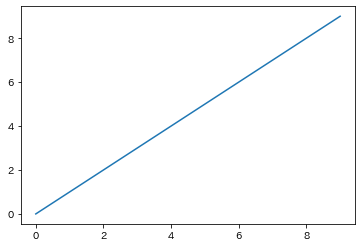

In [582]:
data = np.arange(10)
plt.plot(data)

## 9.1.1 図とサブプロット

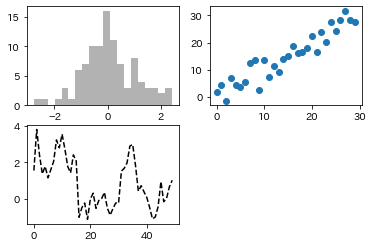

In [43]:
# Matplotlibのプロット機能はfigureオブジェクトに含まれている
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

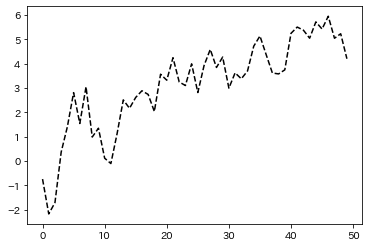

In [584]:
fig2 = plt.figure()
plt.plot(np.random.randn(50).cumsum(),'k--')

Text(0.5, 1.0, 'Subplot 0-1')

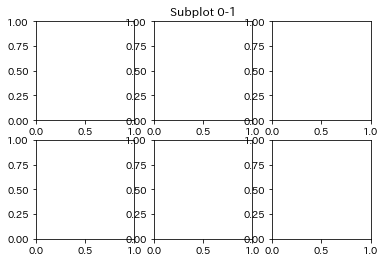

In [5]:
# subplots()関数を利用してサブプロットを配置する場合
fig, axes = plt.subplots(2,3)
axes[0,1].set_title('Subplot 0-1')

## 9.1.1.1 サブプロットのまわりの空白を調整する

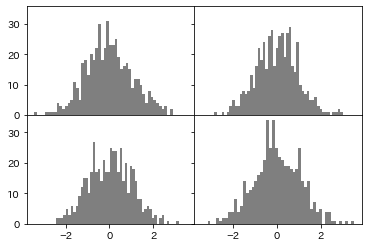

In [9]:
# スペースの調整はgigureオブジェクトのsubplots_adustメソッドを使う

fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)        

## 9.1.2 色、マーカー、線種

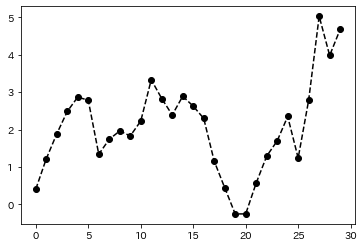

In [585]:
fig4 = plt.figure()
plt.plot(np.random.randn(30).cumsum(),'ko--')

In [10]:
data = np.random.randn(30).cumsum()

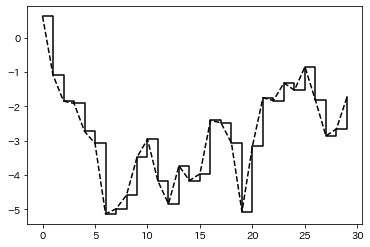

In [16]:
fig912 = plt.figure()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')

## 9.1.3.1 タイトル、軸のラベル、

Text(0.5, 1.0, 'My first matplotlib plot')

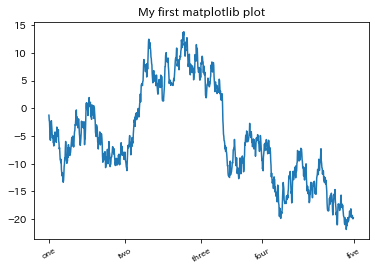

In [20]:
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())

# set_xticksでデータ範囲のどこに目盛りを入れるか、set_xticklabelsはラベルを指定
ticks = ax.set_xticks([0,250,500,700,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')

## 9.1.3.2 凡例の追加

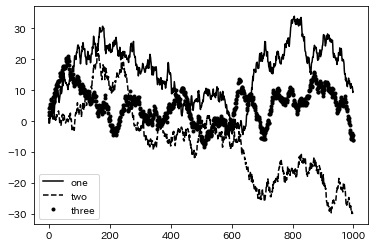

In [25]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## 9.1.4 サブプロットへの注釈や描画

Text(0.5, 1.0, '2008~2009年の金融危機の重要な日付')

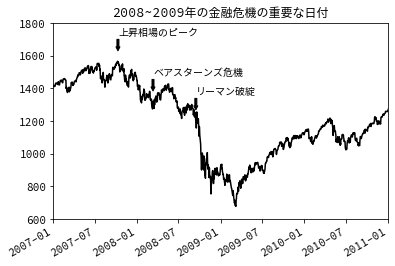

In [37]:
import matplotlib.dates as dates
from datetime import datetime

# 日本語フォントの設定
font_options = {'family': 'Source Han Code JP'}
plt.rc('font', **font_options)

fig = plt.figure()
ax = fig.add_subplot(111)

data = pd.read_csv('pydata-book-2nd-edition/examples/spx.csv',index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10,11), '上昇相場のピーク'),
    (datetime(2008, 3,12), 'ベアスターンズ危機'),
    (datetime(2008, 9,15), 'リーマン破綻')
]

#annotateでテキストと矢印をうまく調整した注釈が入れられる
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
               xytext=(date, spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
    
# X軸のラベルの日付表記を日本語に
#datefmt = dates.DateFormatter('%Y年%m月')
#ax.xaxis.set_major_formatter(datefmt)

# 2007~2010年をズーム
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('2008~2009年の金融危機の重要な日付')

In [ ]:
#　フォントマネージャを使うと利用可能なフォントリストが見れる
import matplotlib.font_manager as fm
fm.findSystemFonts()

## 9.1.5 プロットのファイルへの保存

In [40]:
"""
アクティブな図はplt.savefigでファイル保存出来る
"""

'\nアクティブな図はplt.savefigでファイル保存出来る\n'

## 9.1.6 Matplotlibの設定

In [41]:
"""
PythonからMatplotlibの設定を変更する方法として
rcメソッドを使う
rcの1つ目の引数でカスタマイズしたいfigure,axes,xtick,ytick,grid,legendなどが指定出来る
その後キーワード日キスでパラメータの新しい値を追加する
オプションを書く時は辞書を使うと良い

exsample
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 'small'}
                
plt.rc('font', **font_options)

"""

"\nPythonからMatplotlibの設定を変更する方法として\nrcメソッドを使う\nrcの1つ目の引数でカスタマイズしたいfigure,axes,xtick,ytick,grid,legendなどが指定出来る\nその後キーワード日キスでパラメータの新しい値を追加する\nオプションを書く時は辞書を使うと良い\n\nexsample\nfont_options = {'family': 'monospace',\n                'weight': 'bold',\n                'size': 'small'}\n                \nplt.rc('font', **font_options)\n\n"

## 9.2 Pnadasとseabornのプロット関数

## 9.2.1 折れ線グラフ

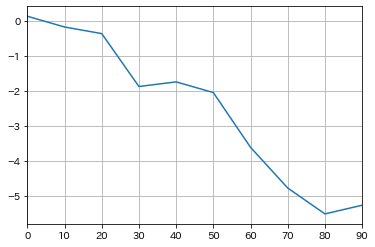

In [5]:
# pandasで折れ線グラフを書く
fig6 = plt.figure()
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(grid=True)

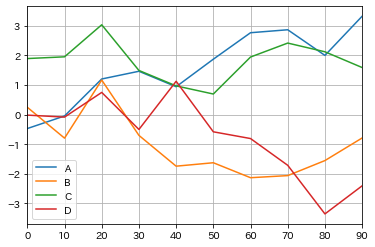

In [6]:
df921 = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                    columns=['A','B','C', 'D'],
                    index=np.arange(0,100,10))

df921.plot(grid=True)

### ■Series.plotメソッドの引数
- label: プロットの凡例を表示するラベル
- ax: プロットするMatplotlibのサブプロットオブジェクト
- style: 'ko--'などの線種指定文字列
- alpha: プロットの不透明度(0～1までの値指定)
- kind: 'area','bar','bath','density','hist','kde','line','pie'のいずれを指定
- logy: Y軸にログスケール
- use_index: 目盛りのラベルにオブジェクトのインデックスを使う
- rot: 目盛りのラベルの回転角
- xticks,ytick: 目盛りに使う値
- xlim,ylim: 軸の範囲
- grid: 軸のグリッドを表示           

### ■dfのplotのみに指定できる引数
- subplots: dfの各列を別々のサブプロットにプロットする
- sharex: subplots=Trueの場合、サブプロット間でX軸を共有する
- sherey: subplots=Trueの場合、サブプロット間でY軸を共有する
- figsizse: 作成する図のサイズ。２つの数値をタプルで指定
- title: プロットのタイトル。文字列で指定
- legend: サブプロットに凡例をつける
- sort_columns: 列をアルファベット順でプロットする

## 9.2.2 棒グラフ

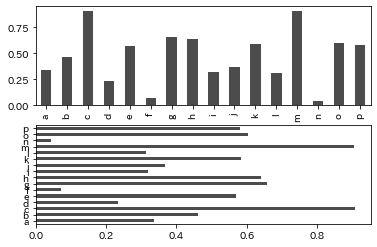

In [7]:
# plot.bar()とplt.barh()で縦棒と横棒が書ける
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [8]:
# dfの場合は各行の値は棒のグループとしてまとめられる

df = pd.DataFrame(np.random.rand(6,4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.027357,0.949139,0.284958,0.062707
two,0.980446,0.203228,0.331397,0.739184
three,0.255375,0.692580,0.184010,0.569818
four,0.948512,0.529006,0.480789,0.052711
five,0.914514,0.839801,0.243329,0.475753
six,0.486401,0.490106,0.854818,0.767709


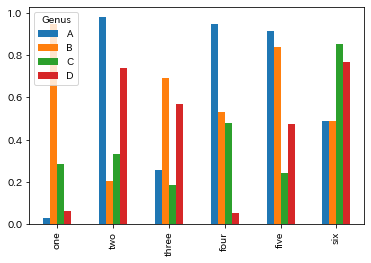

In [9]:
df.plot.bar()

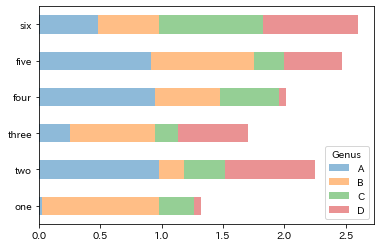

In [12]:
# 積み上げ棒グラフはdfに対してstacked=True

df.plot.barh(stacked=True, alpha=0.5)

In [7]:
tips = pd.read_csv('./pydata-book-2nd-edition/examples/tips.csv')

In [14]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
# グループの出現頻度を計算
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [9]:
# 1人と6人の団体は多くない
party_counts = party_counts.loc[:, 2:5]

In [10]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [11]:
party_counts.sum()

size
2    156
3     38
4     37
5      5
dtype: int64

In [12]:
# 合計が1になるよう正規化
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


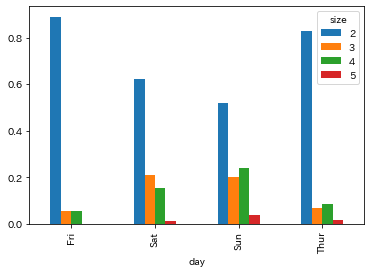

In [26]:
party_pcts.plot.bar()

In [3]:
# seabornをインポート
import seaborn as sns

In [13]:
tips['tip_pct']=tips['tip'] /(tips['total_bill'] - tips['tip'])

In [29]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


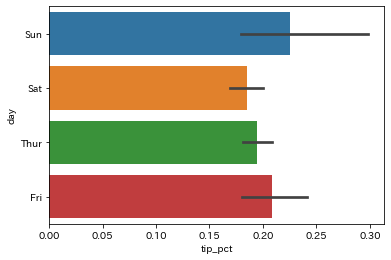

In [14]:
# seabornで曜日ごとのチップの割合を見る
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

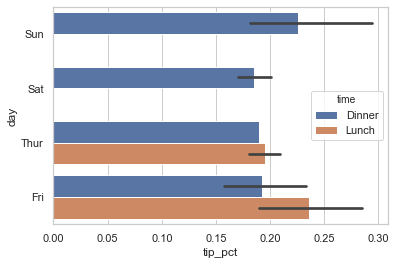

In [22]:
# seaborn.barplotにhueオプションを入れるとカテゴリごちに分けて集計できる

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [21]:
# グラフの見た目を変える
sns.set(style='whitegrid')

## 9.2.3 ヒストグラムと密度プロット

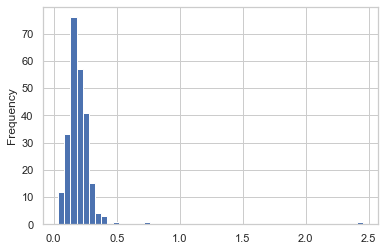

In [23]:
# ヒストグラムを表示
fig8 = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

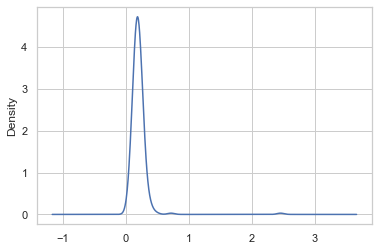

In [25]:
# 一般的な混合正規分布カーネル密度推定(KDE)を用いた密度プロット
tips['tip_pct'].plot.density()

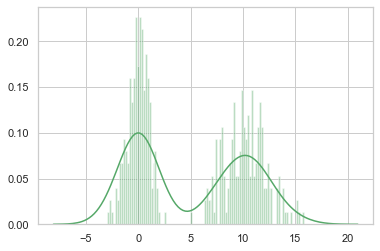

In [29]:
# seabornでヒストグラムと密度推定をプロット
comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='g')


## 9.2.4 散布図 

In [30]:
macro = pd.read_csv('./pydata-book-2nd-edition/examples/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]

In [31]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [33]:
trans_data = np.log(data).diff().dropna()

In [34]:
trans_data[:10]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
6,0.006745,0.004980,-0.127155,0.074108
7,0.003021,0.001418,-0.030110,0.117783
8,-0.001006,0.007062,0.034338,0.076373
9,0.003683,0.005614,-0.034338,0.028988
10,0.002003,0.008362,0.013015,-0.028988


Text(0.5, 1.0, 'Change in log m1 versus log unemp')

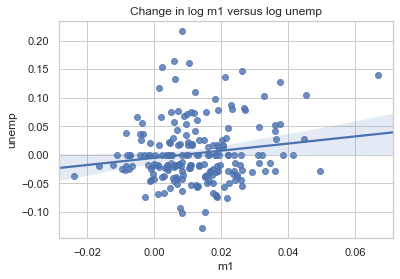

In [35]:
# seabornのregpltで散布図と線形回帰
fig9 = plt.figure()
sns.regplot('m1','unemp', data=trans_data)
plt.title('Change in log %s versus log %s' %('m1','unemp'))

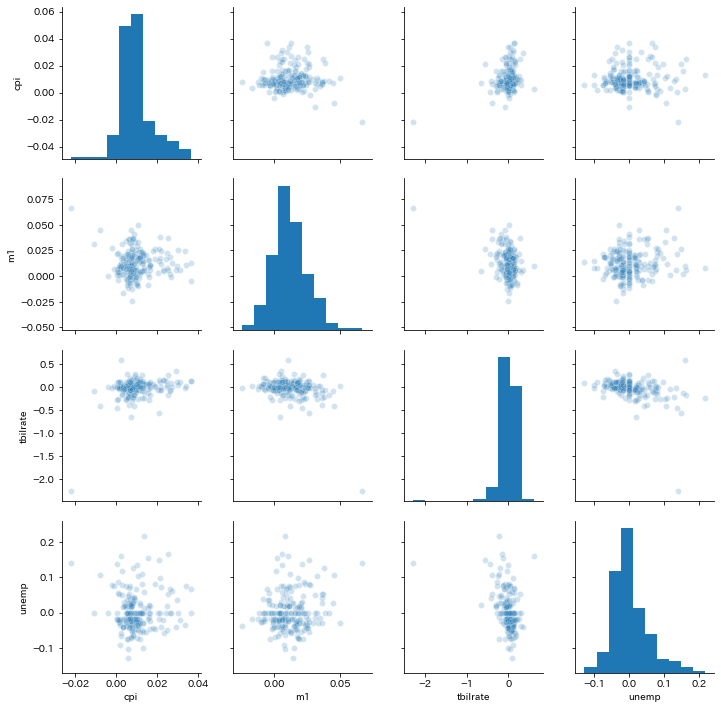

In [591]:
# seabornのpairplotで散布図行列が作れる
sns.pairplot(trans_data,plot_kws={'alpha':0.2})

## 9.2.5 ファセットグリッドとカテゴリ型データ

C:\Users\mikam\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


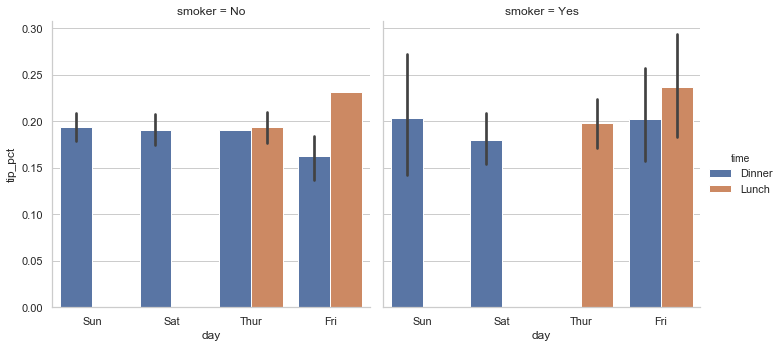

In [36]:
# factorplotで特定の属性値でデータをまとめ並べて表示できる
# factorplotはcatplotに変更される

#例はsmokerを並べて表示
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',
            kind='bar',data=tips[tips.tip_pct < 1])

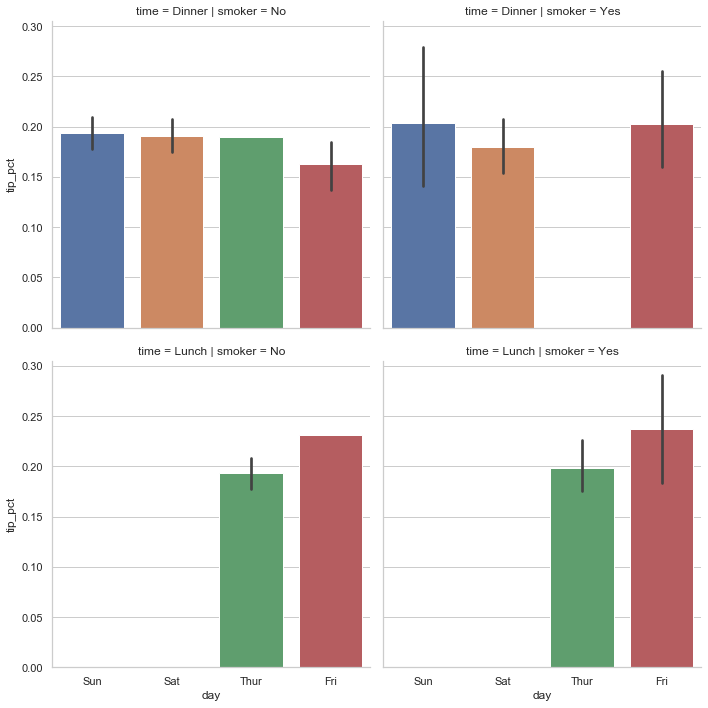

In [37]:
# 'time'の値ごとに行を追加するファセットグリッド
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\mikam\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


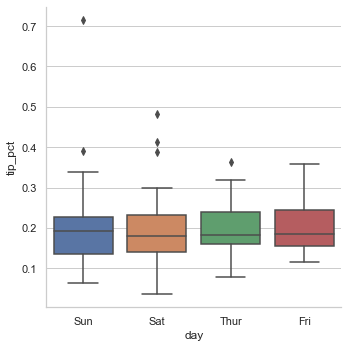

In [47]:
# boxplotで表示
sns.factorplot(x='day', y='tip_pct',kind='box', data=tips[tips.tip_pct < 1])